# Doctor's Consultation Fee Prediction Challenge

## This competition is hosted on https://www.machinehack.com/course/predict-a-doctors-consultation-fees-hackathon/ in which we have to predict the 
## doctor's consultation fee on the bases of the information given about doctor

# Data Description

##  The data include following columns:-

### Qualification: Qualification and degrees held by the doctor

### Experience: Experience of the doctor in number of years

### Rating: Rating given by patients

### Profile: Type of the doctor

### Miscellaeous_Info: Extra information about the doctor

### Fees: Fees charged by the doctor

### Place: Area and the city where the doctor is located.

# Creating Random Forest Model to predict Fee

In [1]:
# Importing fastai libraries

from fastai.imports import *
from fastai.structured import *

In [2]:
!ls

'Doc fee.ipynb'       final.csv		'Price Detection.ipynb'   temp.py
 Doc_fee_lgbm.ipynb   Final_Test.xlsx	 Sample_submission.xlsx   untitled0.py
 fastai		      Final_Train.xlsx	 submission.xlsx
 fastai3.ipynb	      last.csv		 sub.py


In [3]:
train=pd.read_excel('Final_Train.xlsx')
test=pd.read_excel('Final_Test.xlsx')

In [4]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [5]:
train.shape, test.shape

((5961, 7), (1987, 6))

In [6]:
import re
# cleaning experience column
exp=[]

for j in range(0,5961):
    year=re.sub(r'\D', "", train['Experience'][j])
    exp.append(year)
    
train['experience']=exp

exptest=[]
for j in range(0,1987):
    yeartest=re.sub(r'\D', "", test['Experience'][j])
    exptest.append(yeartest)
test['experience']=exptest

In [7]:
train.head(5)


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,experience
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [8]:
test.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,experience
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,35
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,31
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",40
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,16


In [9]:
## cleaning info colum
    
info=[]

for k in range(0,5961):
    data=re.findall('[0-9][0-9][\s\s]Feedback', str(train['Miscellaneous_Info'][k]))
    data=re.sub(r'\D', "", str(data))
   
    info.append(data)
    
train['information']=info



infotst=[]
for k in range(0,1987):
   
    datatst=re.findall('[0-9][0-9][\s\s]Feedback', str(test['Miscellaneous_Info'][k]))
    datatst=re.sub(r'\D', "", str(datatst))
    
    infotst.append(datatst)

test['information']=infotst

In [10]:
# cleaning rating column
rating=[]

for j in range(0,5961):
    yeartrn=re.sub(r'[^\d]', "", str(train['Rating'][j]))
    
    rating.append(yeartrn)
    
train['ratting']=rating



ratingtst=[]
for j in range(0,1987):
    
    yeartst=re.sub(r'[^\d]', "", str(test['Rating'][j]))
    
    ratingtst.append(yeartst)

test['ratting']=ratingtst

In [11]:
train.drop(['Experience', 'Miscellaneous_Info','Rating'], axis=1, inplace=True)
test.drop(['Experience', 'Miscellaneous_Info','Rating'], axis=1, inplace=True)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification    5961 non-null object
Place            5936 non-null object
Profile          5961 non-null object
Fees             5961 non-null int64
experience       5961 non-null object
information      5961 non-null object
ratting          5961 non-null object
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [13]:
train[["experience", "information", "ratting"]] = train[["experience", "information", "ratting"]].apply(pd.to_numeric)
test[["experience", "information", "ratting"]] = test[["experience", "information", "ratting"]].apply(pd.to_numeric)

In [14]:
# creating new column from rating and info and experience
new=[]
for i in range(0, 5961):
    feed=(train['ratting'][i]+train['experience'][i]+train['information'][i])/3
    new.append(feed)
train['new']=new

newtst=[]
for i in range(0, 1987):
    feedtst=(test['ratting'][i]+test['experience'][i]+test['information'][i])/3
    newtst.append(feedtst)
test['new']=newtst

In [15]:
train.columns, test.columns

(Index(['Qualification', 'Place', 'Profile', 'Fees', 'experience',
        'information', 'ratting', 'new'],
       dtype='object'),
 Index(['Qualification', 'Place', 'Profile', 'experience', 'information',
        'ratting', 'new'],
       dtype='object'))

In [16]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
Qualification    5961 non-null object
Place            5936 non-null object
Profile          5961 non-null object
Fees             5961 non-null int64
experience       5961 non-null int64
information      969 non-null float64
ratting          2659 non-null float64
new              969 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 372.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
Qualification    1987 non-null object
Place            1981 non-null object
Profile          1987 non-null object
experience       1987 non-null int64
information      367 non-null float64
ratting          897 non-null float64
new              367 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 108.7+ KB


(None, None)

In [17]:
train.isnull().sum()

Qualification       0
Place              25
Profile             0
Fees                0
experience          0
information      4992
ratting          3302
new              4992
dtype: int64

In [18]:
train_cats(train)

In [19]:
train_cats(test)

In [20]:
df_trn, y_trn, nas = proc_df(train, 'Fees', max_n_cat=7)
df_tst, y_tst, nas = proc_df(test, max_n_cat=7)

In [21]:
df_trn.head(5)

,Qualification,Place,experience,information,ratting,new,information_na,ratting_na,new_na,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Profile_nan
0,402,300,24,16.0,100.0,46.666667,False,False,False,0,0,0,0,0,1,0
1,74,867,12,76.0,98.0,62.000000,False,False,False,1,0,0,0,0,0,0
2,1136,458,9,26.0,97.0,47.000000,True,True,True,0,0,0,1,0,0,0
3,465,69,12,26.0,97.0,47.000000,True,True,True,1,0,0,0,0,0,0
4,11,338,20,26.0,100.0,47.000000,True,False,True,1,0,0,0,0,0,0


In [22]:
df_tst.head(5)

,Qualification,Place,experience,information,ratting,new,information_na,ratting_na,new_na,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath,Profile_nan
0,242,143,35,23.0,97.0,46.0,True,True,True,0,0,0,0,1,0,0
1,341,581,31,23.0,97.0,46.0,True,True,True,0,0,0,1,0,0,0
2,259,213,40,23.0,70.0,46.0,True,False,True,0,0,1,0,0,0,0
3,7,375,0,23.0,97.0,46.0,True,True,True,1,0,0,0,0,0,0
4,80,232,16,23.0,100.0,46.0,True,False,True,0,1,0,0,0,0,0


In [23]:
train.to_feather('train_raw')
test.to_feather('test_raw')


In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_trn, y_trn, test_size = 0.25, random_state = 0)

## creating random forest model

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
# predicting the test results
y_pred=regressor.predict(df_tst)

In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
print_score(regressor)

[79.44186131095084, 185.03391379482053, 0.8256038756390304, 0.07953408603692491]


# Feature importance

In [39]:
fi = rf_feat_importance(regressor, df_trn); fi[:10]

,cols,imp
1,Place,0.329354
0,Qualification,0.248068
2,experience,0.207654
4,ratting,0.062185
3,information,0.025332
5,new,0.023773
10,Profile_Dentist,0.022176
7,ratting_na,0.021740
14,Profile_Homeopath,0.013252
11,Profile_Dermatologists,0.011975


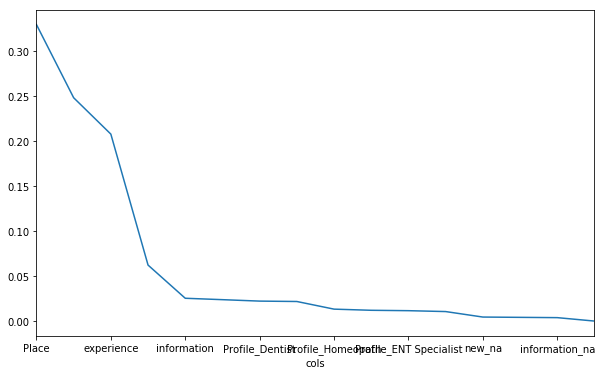

In [40]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

In [41]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

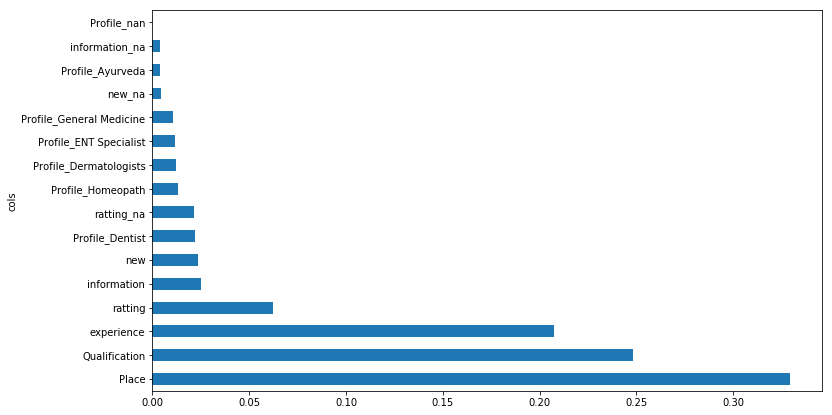

In [42]:
plot_fi(fi[:30]);

### Removing less significant columns

In [43]:
to_keep = fi[fi.imp>0.01].cols; len(to_keep)

12

In [44]:
df_keep = df_trn[to_keep].copy()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_keep, y_trn, test_size = 0.2, random_state = 0)

In [46]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [44]:
print_score(m)

[120.35080919766222, 176.52772645369356, 0.601027547508105, 0.15758946304031363, 0.13991961900348127]


### Score has improved after removing a number of columns which are less important to determine the doctor's
### consultation fees. Now lgbm model is used in next notebook to improve score.